i'm in poetry enviroment, installed add all needed packag: pandas matplotlib numpy seaborn scikit-learn give me a line to run 

In [2]:
!poetry add pandas matplotlib numpy seaborn scikit-learn

Configuration file exists at /Users/nirkon/Library/Preferences/pypoetry, reusing this directory.

Consider moving TOML configuration files to /Users/nirkon/Library/Application Support/pypoetry, as support for the legacy directory will be removed in an upcoming release.
The following packages are already present in the pyproject.toml and will be skipped:

  - pandas
  - matplotlib
  - numpy
  - seaborn
  - scikit-learn

If you want to update it to the latest compatible version, you can use `poetry update package`.
If you prefer to upgrade it to the latest available version, you can use `poetry add package@latest`.

Nothing to add.


import all the nececery

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression

import matplotlib.pyplot as plt

load the data set from data folder
name is mental-data.csv

In [4]:
# Load the dataset from the data folder
data_path = 'data/mental-data.csv'
df = pd.read_csv(data_path)
print(df.head())

   Unnamed: 0                                          statement   status
0           0                                         oh my gosh  Anxiety
1           1  trouble sleeping, confused mind, restless hear...  Anxiety
2           2  All wrong, back off dear, forward doubt. Stay ...  Anxiety
3           3  I've shifted my focus to something else but I'...  Anxiety
4           4  I'm restless and restless, it's been a month n...  Anxiety


How many rows? 
how many words in average in the statement coloumn? 
what are the possible values from status?

In [5]:
# Number of rows
num_rows = df.shape[0]
print(f"Number of rows: {num_rows}")

# Average number of words in the statement column
df['word_count'] = df['statement'].apply(lambda x: len(str(x).split()))
average_word_count = df['word_count'].mean()
print(f"Average number of words in the statement column: {average_word_count}")

# Possible values from status
status_values = df['status'].unique()
print(f"Possible values from status: {status_values}")

Number of rows: 53043
Average number of words in the statement column: 112.39328469355051
Possible values from status: ['Anxiety' 'Normal' 'Depression' 'Suicidal' 'Stress' 'Bipolar'
 'Personality disorder']


what are the most common words in the statement - ingnore case, draw histogram

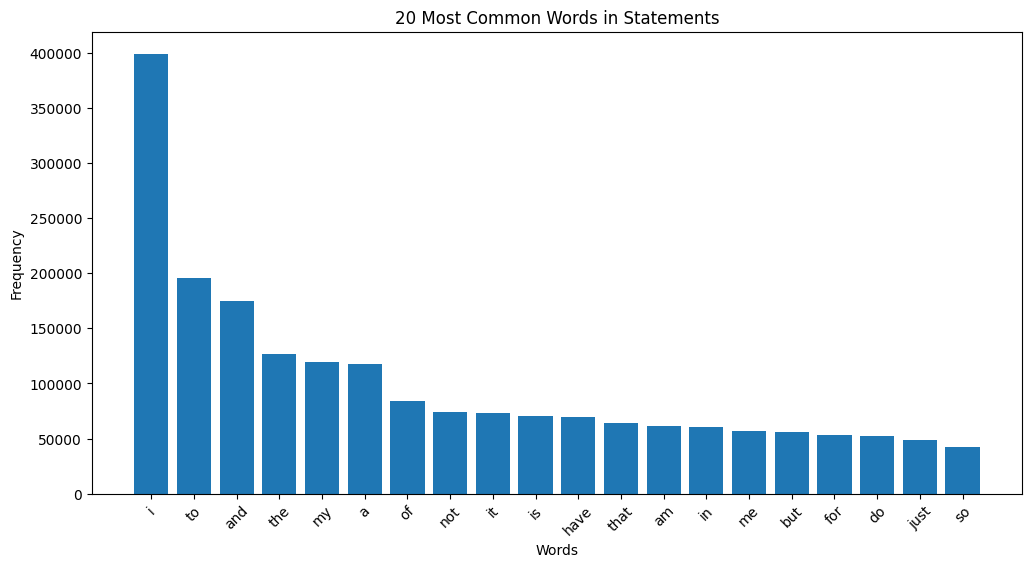

In [7]:
from collections import Counter

import matplotlib.pyplot as plt

# Combine all statements into a single string
all_statements = ' '.join(df['statement'].dropna()).lower()

# Split the string into words
words = all_statements.split()

# Count the frequency of each word
word_counts = Counter(words)

# Get the 20 most common words
common_words = word_counts.most_common(20)

# Separate the words and their counts for plotting
words, counts = zip(*common_words)

# Plot the histogram
plt.figure(figsize=(12, 6))
plt.bar(words, counts)
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.title('20 Most Common Words in Statements')
plt.xticks(rotation=45)
plt.show()

show me in pie chart of the possible values for status?

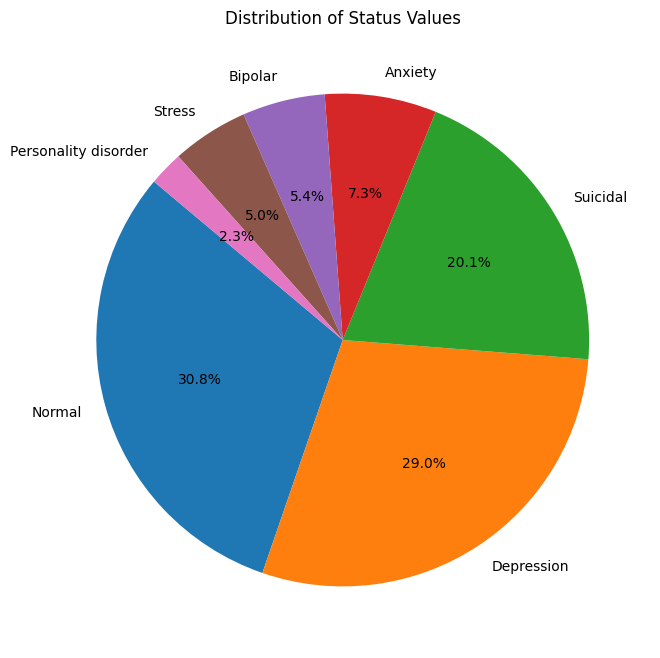

In [8]:
# Count the occurrences of each status value
status_counts = df['status'].value_counts()

# Plot the pie chart
plt.figure(figsize=(8, 8))
plt.pie(status_counts, labels=status_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Status Values')
plt.show()

Check the data for problems before i split it ?

In [9]:
# Check for missing values
missing_values = df.isnull().sum()
print("Missing values in each column:")
print(missing_values)

# Check for duplicate rows
duplicate_rows = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicate_rows}")


Missing values in each column:
Unnamed: 0      0
statement     362
status          0
word_count      0
dtype: int64
Number of duplicate rows: 0


fix the missing issues with removing the lines 

In [10]:
# Remove rows with any missing values
df_cleaned = df.dropna()
print(f"Number of rows after removing missing values: {df_cleaned.shape[0]}")


Number of rows after removing missing values: 52681


split the data to train and test 

In [11]:
# Split the data into train and test sets
X = df_cleaned['statement']
y = df_cleaned['status']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Number of training samples: {X_train.shape[0]}")
print(f"Number of testing samples: {X_test.shape[0]}")

Number of training samples: 42144
Number of testing samples: 10537


show me the distribution of y in the rain and test side by side in a pie chart, use python

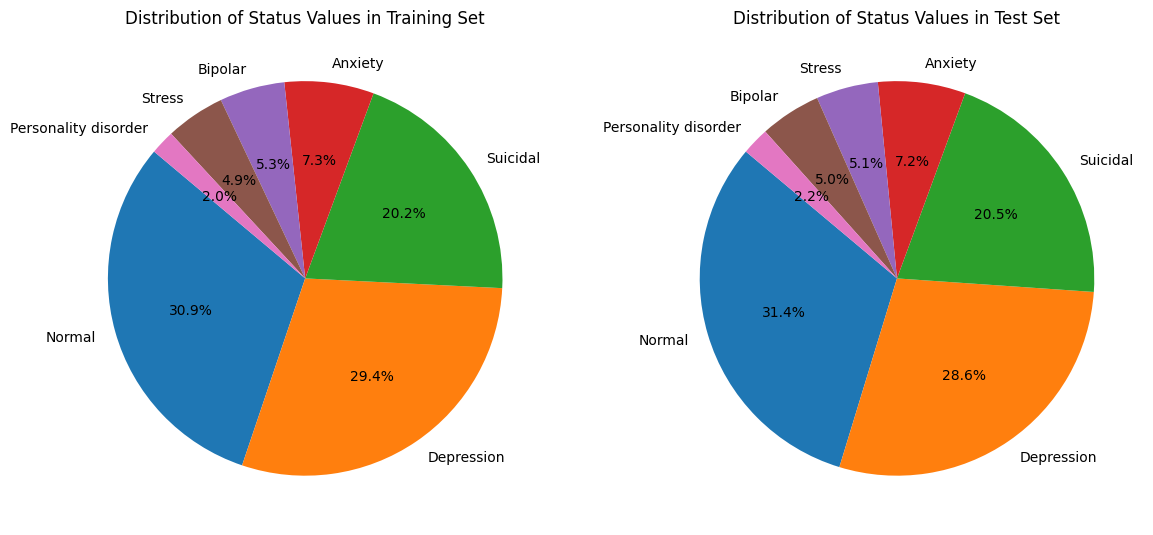

In [12]:
# Distribution of y in the train and test sets
train_status_counts = y_train.value_counts()
test_status_counts = y_test.value_counts()

# Plot the pie charts side by side
fig, axes = plt.subplots(1, 2, figsize=(14, 7))

# Train set pie chart
axes[0].pie(train_status_counts, labels=train_status_counts.index, autopct='%1.1f%%', startangle=140)
axes[0].set_title('Distribution of Status Values in Training Set')

# Test set pie chart
axes[1].pie(test_status_counts, labels=test_status_counts.index, autopct='%1.1f%%', startangle=140)
axes[1].set_title('Distribution of Status Values in Test Set')

plt.show()

i want to vectorize the X in train and test, how?

In [13]:
# Initialize the TfidfVectorizer
vectorizer = TfidfVectorizer()

# Fit and transform the training data
X_train_tfidf = vectorizer.fit_transform(X_train)

# Transform the test data
X_test_tfidf = vectorizer.transform(X_test)

print(f"Shape of X_train_tfidf: {X_train_tfidf.shape}")
print(f"Shape of X_test_tfidf: {X_test_tfidf.shape}")

Shape of X_train_tfidf: (42144, 52732)
Shape of X_test_tfidf: (10537, 52732)


Print the most meanigfull words in the X tf-idf vector, plot histogram?

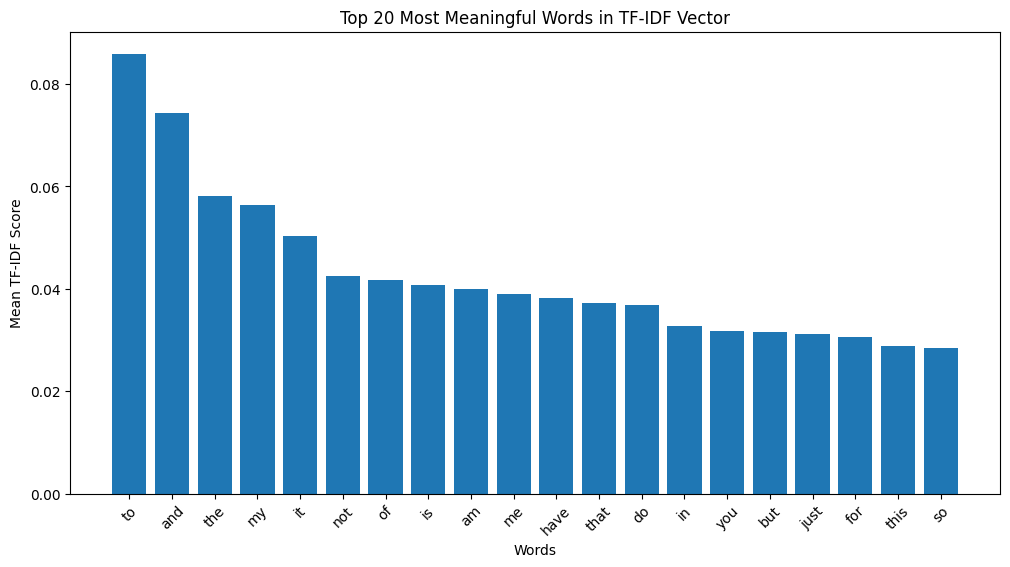

In [14]:
# Get the feature names (words) from the vectorizer
feature_names = vectorizer.get_feature_names_out()

# Calculate the mean tf-idf score for each word in the training set
mean_tfidf_scores = X_train_tfidf.mean(axis=0).A1

# Create a DataFrame with words and their mean tf-idf scores
tfidf_df = pd.DataFrame({'word': feature_names, 'mean_tfidf': mean_tfidf_scores})

# Sort the DataFrame by mean tf-idf scores in descending order
tfidf_df = tfidf_df.sort_values(by='mean_tfidf', ascending=False)

# Get the top 20 words with the highest mean tf-idf scores
top_words = tfidf_df.head(20)

# Plot the histogram
plt.figure(figsize=(12, 6))
plt.bar(top_words['word'], top_words['mean_tfidf'])
plt.xlabel('Words')
plt.ylabel('Mean TF-IDF Score')
plt.title('Top 20 Most Meaningful Words in TF-IDF Vector')
plt.xticks(rotation=45)
plt.show()

i want to train algorithm to predict, and will be right for this task. do full statistical report with confusion matrix.

Classification Report:
                      precision    recall  f1-score   support

             Anxiety       0.83      0.76      0.80       755
             Bipolar       0.88      0.69      0.78       527
          Depression       0.69      0.74      0.71      3016
              Normal       0.87      0.95      0.91      3308
Personality disorder       0.87      0.43      0.57       237
              Stress       0.71      0.50      0.59       536
            Suicidal       0.70      0.67      0.69      2158

            accuracy                           0.77     10537
           macro avg       0.79      0.68      0.72     10537
        weighted avg       0.77      0.77      0.77     10537

Confusion Matrix:
[[ 577   10   76   63    3   22    4]
 [   8  365   97   31    4    8   14]
 [  46   18 2240  145    2   17  548]
 [  11    8   73 3132    3   41   40]
 [   4    3   84   20  101   18    7]
 [  47    6  115   79    3  268   18]
 [   2    3  576  121    0    3 1453]]


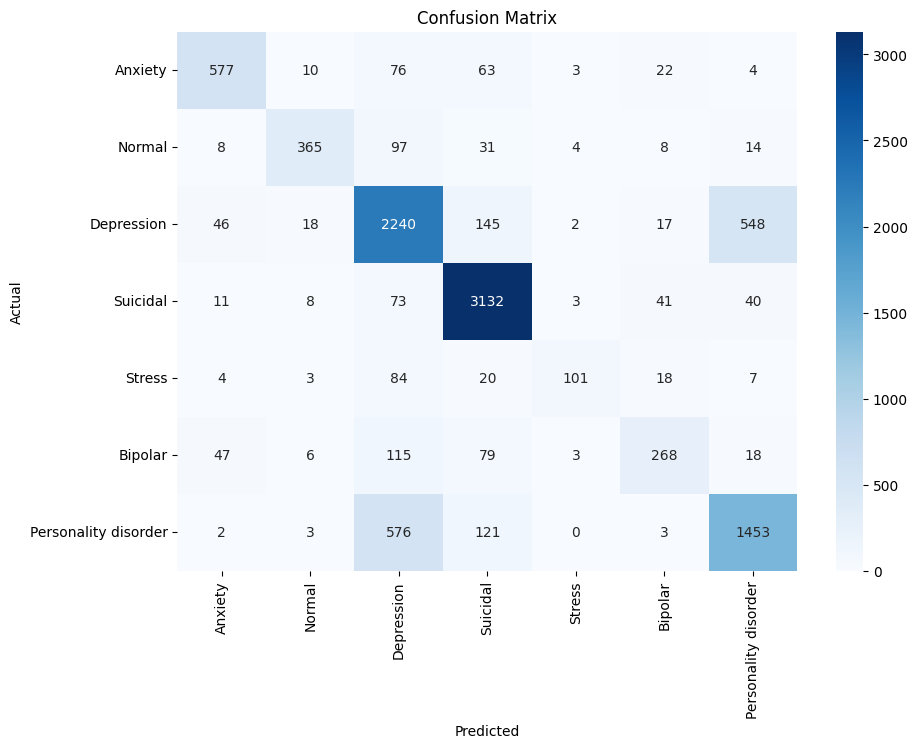

In [15]:
# Initialize the Logistic Regression model
model = LogisticRegression(max_iter=1000)

# Create a pipeline with the vectorizer and the model
pipeline = Pipeline([
    ('tfidf', vectorizer),
    ('clf', model)
])

# Train the model
pipeline.fit(X_train, y_train)

# Make predictions on the test set
y_pred = pipeline.predict(X_test)

# Generate the classification report
report = classification_report(y_test, y_pred)
print("Classification Report:")
print(report)

# Generate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

# Plot the confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=status_values, yticklabels=status_values)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

Now save the model in model folder so i can use it later and make it a pipline so i enter words in and it will give me string label out

In [16]:
import joblib

# Save the pipeline model to the model folder
model_path = 'model/pipeline_model.joblib'
joblib.dump(pipeline, model_path)

print(f"Model saved to {model_path}")

Model saved to model/pipeline_model.joblib


Save the test x as lines to model/test.txt

In [17]:
# Save the test X as lines to model/test.txt
test_path = 'model/test.txt'
X_test.to_csv(test_path, index=False, header=False)

print(f"Test X saved to {test_path}")

Test X saved to model/test.txt


I don't fully understand my statements words distributiuon can you draw words cloud chart after the vectorize on the important words in the X test vectorized?

In [18]:
import joblib

# Save the pipeline model to the model folder as a .pkl file
model_pkl_path = 'model/pipeline_model.pkl'
joblib.dump(pipeline, model_pkl_path)

print(f"Model saved to {model_pkl_path}")

Model saved to model/pipeline_model.pkl
